In [2]:
!pip install tensorflow

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [4]:
# Load and scale the Iris dataset
iris = load_iris()
X = iris.data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# ---- Define Autoencoder Architecture ----
input_dim = X_scaled.shape[1]
encoding_dim = 2  # Reduce to 2 dimensions


In [6]:
# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)


In [7]:
# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)


In [8]:
# Autoencoder Model
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.01), loss='mse')


In [9]:

# Train the autoencoder
history = autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=16, verbose=0)


In [10]:
# Encoder model for extracting compressed representations
encoder = Model(inputs=input_layer, outputs=encoded)
encoded_data = encoder.predict(X_scaled)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


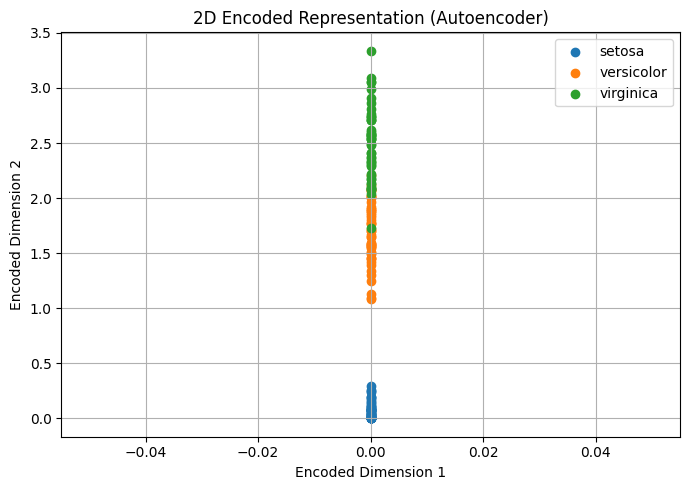

In [11]:
# ---- Plot Encoded Data ----
plt.figure(figsize=(7, 5))
for i in range(3):
    plt.scatter(encoded_data[iris.target == i, 0], encoded_data[iris.target == i, 1], label=iris.target_names[i])
plt.title("2D Encoded Representation (Autoencoder)")
plt.xlabel("Encoded Dimension 1")
plt.ylabel("Encoded Dimension 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()